In [1]:
import qiskit_braket_provider

## Criando o circuito quântico

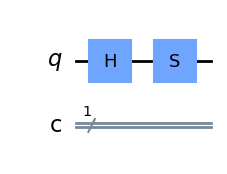

In [4]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1,1)
qc.h(0)
qc.s(0)

qc.draw('mpl')

## Executando no simulador local

In [5]:
from qiskit_braket_provider import BraketLocalBackend

local_simulator = BraketLocalBackend()

task = local_simulator.run(qc, shots = 2**13)

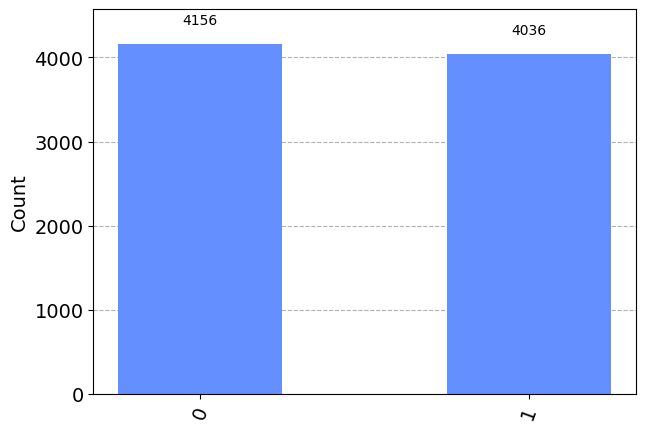

In [7]:
from qiskit.visualization import plot_histogram

counts = task.result().get_counts()

plot_histogram(counts)

## Tomografia de estados

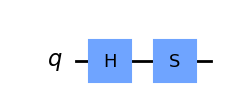

In [8]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.draw('mpl')

In [9]:
# Tem que instalar o Qiskit Experiments
# pip install qiskit-experiments
from qiskit_experiments.library.tomography import StateTomography

In [10]:
# circuitos para tomografia de estados
qstc = StateTomography(qc, [0])

In [11]:
qstc

### Simulador do qiskit

In [12]:
from qiskit import Aer
simulator = Aer.get_backend('qasm_simulator')

In [13]:
qstd = qstc.run(simulator).block_for_results()

In [14]:
from qiskit.visualization import array_to_latex
qstr = qstd.analysis_results("state").value
array_to_latex(qstr)

<IPython.core.display.Latex object>

In [15]:
qstf = qstd.analysis_results("state_fidelity")
print(f"State fidelity = {qstf.value}")

State fidelity = 0.9998074690497085


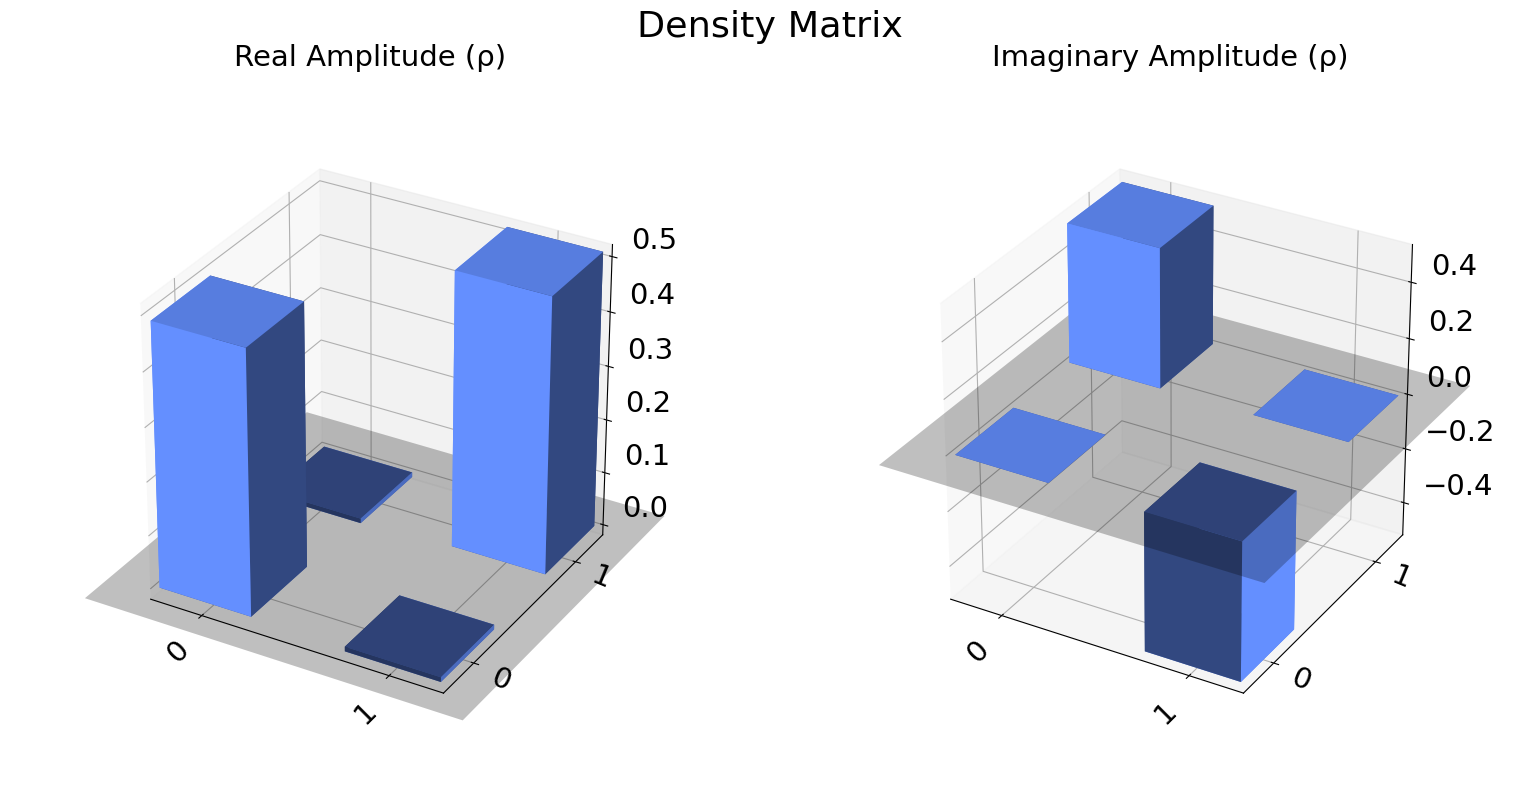

In [16]:
from qiskit.visualization import plot_state_city
plot_state_city(qstr, title='Density Matrix')

### Simulador do braket

In [19]:
#qstd = qstc.run(local_simulator).block_for_results() # maneira do qiskit
qstd = qstc.run(local_simulator).block_for_results()

Analysis callback failed [Experiment ID: 532df74a-604c-4433-9989-740bbd3947f2][Analysis Callback ID: 817d1dbfd91b4b80a87e5dfc26e2bad0]:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\qiskit_experiments\framework\experiment_data.py", line 897, in _run_analysis_callback
    callback(self, **kwargs)
  File "C:\Python311\Lib\site-packages\qiskit_experiments\framework\base_analysis.py", line 169, in run_analysis
    results, figures = analysis._run_analysis(expdata)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\qiskit_experiments\library\tomography\tomography_analysis.py", line 192, in _run_analysis
    outcome_data, shot_data, meas_data, prep_data = tomography_fitter_data(
                                                    ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\qiskit_experiments\library\tomography\fitters\fitter_data.py", line 69, in tomography_fitter_data
    metadata = datum["metadata"]
 